In [65]:
import pydicom as dicom
import cv2

In [66]:
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random
import pandas as pd
import numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')
from skimage.transform import resize

In [67]:
# View image
def show_image(image_path):
    ds = dicom.dcmread(image_path)

    pixel_array_numpy = ds.pixel_array
    max_pixel = np.max(pixel_array_numpy)
    pixel_array_numpy = pixel_array_numpy / max_pixel * 255

    plt.imshow(pixel_array_numpy, cmap="gray")
    plt.show()

In [72]:
# Show image grid
def show_grid(files, row=3, col=3, IMG_PX_SIZE = 512):
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        
        #img          = cv2.resize(cv2.imread(image_path), dsize=(512,512))
        ds          = dicom.dcmread(image_path)
        pixel_array_numpy = ds.pixel_array
        resized_img = resize(pixel_array_numpy, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
        images.append(resized_img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [73]:
# Base path for dataset
base_path = '../data/INbreast Release 1.0'

In [74]:
img_base = base_path + "/AllDICOMs"
directory = os.fsencode(img_base)
list_of_images = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    list_of_images.append(img_base + "/" + filename)

100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


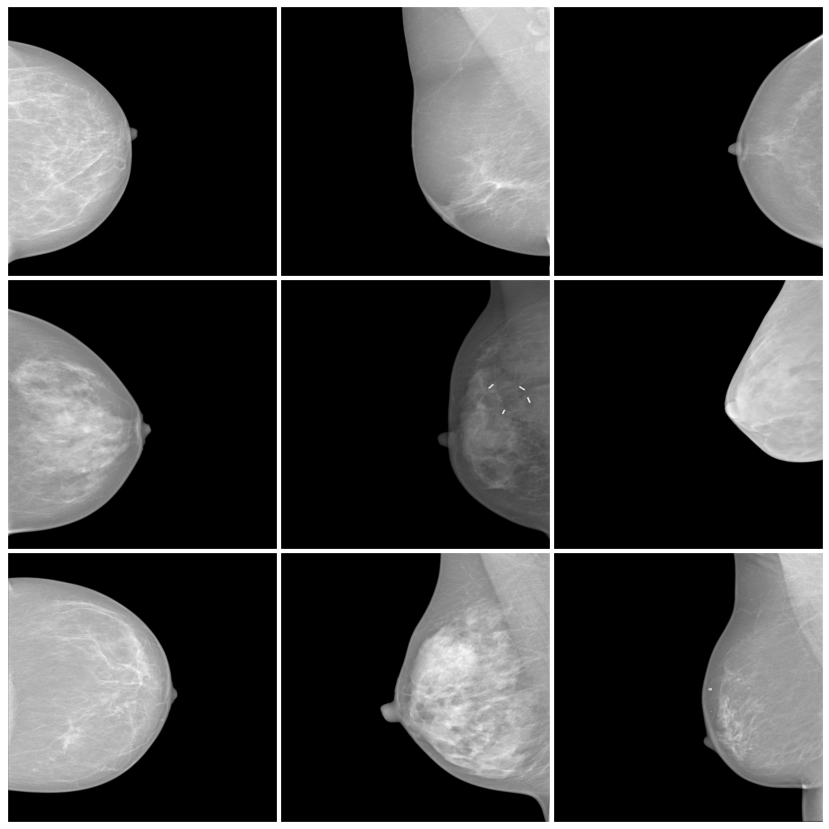

In [76]:
show_grid(list_of_images)

In [ ]:
x½

In [ ]:
meta_df

In [ ]:
# nnUNet segmentation

In [ ]:
# Process images
def process_image(image_path):
    ds = dicom.dcmread(image_path)

    pixel_array_numpy = ds.pixel_array
    
    print(pixel_array_numpy)
    max_pixel = np.max(pixel_array_numpy)
    pixel_array_numpy = pixel_array_numpy / max_pixel * 255
    
    print(np.max(pixel_array_numpy))

    plt.imshow(pixel_array_numpy, cmap="gray")

    image_format = ".jpeg"
    image_path = image_path.replace('.dcm', image_format).replace("/AllDICOMs", "/converted_images")
    print(image_path)

    cv2.imwrite(image_path, pixel_array_numpy)
    return cv2